In [10]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
MINCOVERAGETHRESH = 1
df = pd.read_csv("/Users/ethanbaker/Grace2/enhancerSeq/analysis/H1WG.SCP1.H1.R1_5kbWindowsVsControl_Calculations.txt", sep='\t')
print(len(df.index))
df.drop("log(enhancerSeq/control)", axis=1, inplace=True)
df.sort_values(['mean_coverage','control_mean_coverage'],inplace=True)
df.drop(df[df.mean_coverage < MINCOVERAGETHRESH].index,inplace=True)
df.drop(df[df.control_mean_coverage < MINCOVERAGETHRESH].index, inplace = True)
df.head()

619146


,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage
334637,chr8,125095000,125100000,5005,1.0010,1.5212
312525,chr8,14535000,14540000,5006,1.0012,1.0356
332673,chr8,115275000,115280000,5006,1.0012,1.1320
202035,chr5,128540000,128545000,5006,1.0012,1.1590
415283,chr11,105210000,105215000,5009,1.0018,1.3004


In [7]:
len(df.index)

544383

In [9]:
df['FoldEnrichment'] = df["mean_coverage"]/df["control_mean_coverage"]
df.sort_values("FoldEnrichment", inplace=True)
df.head()

,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage,FoldEnrichment
421262,chr12,95000,100000,6188,1.2376,6.9086,0.179139
176329,chr5,10000,15000,54404,10.8808,52.6192,0.206784
106485,chr3,39970000,39975000,5347,1.0694,2.4600,0.434715
448011,chr12,133840000,133845000,26493,5.2986,11.8296,0.447910
143965,chr4,29345000,29350000,8033,1.6066,3.5590,0.451419


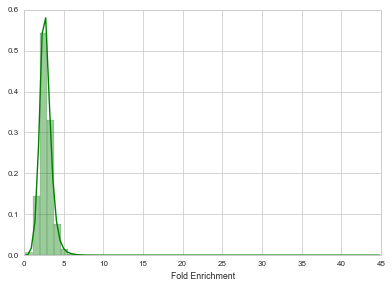

In [11]:
sns.set(style="whitegrid", context = "paper")
sns.distplot(df["FoldEnrichment"],color='g')
plt.xlabel("Fold Enrichment")
plt.show()

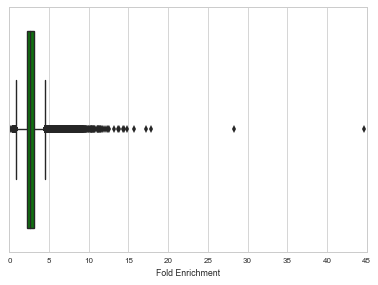

In [13]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.boxplot(df["FoldEnrichment"], color='g')
plt.xlabel("Fold Enrichment")
plt.show()

In [14]:
df["logFoldEnrichment"] = np.log(df["FoldEnrichment"])
df.head()

,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage,FoldEnrichment,logFoldEnrichment
421262,chr12,95000,100000,6188,1.2376,6.9086,0.179139,-1.719593
176329,chr5,10000,15000,54404,10.8808,52.6192,0.206784,-1.576081
106485,chr3,39970000,39975000,5347,1.0694,2.4600,0.434715,-0.833064
448011,chr12,133840000,133845000,26493,5.2986,11.8296,0.447910,-0.803162
143965,chr4,29345000,29350000,8033,1.6066,3.5590,0.451419,-0.795359


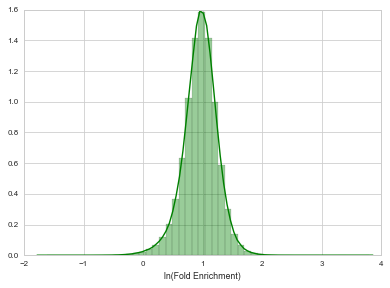

In [15]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.distplot(df["logFoldEnrichment"],color='g')
plt.xlabel("ln(Fold Enrichment)")
plt.show()

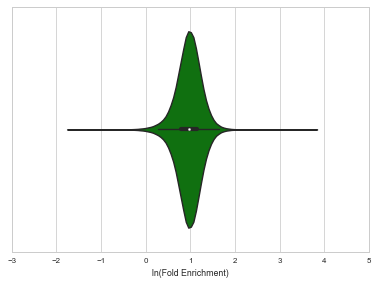

In [17]:
plt.clf()
sns.set(style="whitegrid", context = "paper")
sns.violinplot(df["logFoldEnrichment"],color='g')
plt.xlabel("ln(Fold Enrichment)")
plt.show()

In [22]:
R1_20th = np.percentile(df["logFoldEnrichment"],80)
R1_top20 = df[df.logFoldEnrichment >= R1_10th]
print(len(R1_top20.index))
R1_top20.sort_values("logFoldEnrichment",inplace=True, ascending=False)
R1_top20.head()

108877


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,chrom,start,end,cumulative_coverage,mean_coverage,control_mean_coverage,FoldEnrichment,logFoldEnrichment
56479,chr2,33140000,33145000,6168410,1233.6820,27.6282,44.652999,3.798921
141498,chr4,17010000,17015000,884841,176.9682,6.2510,28.310382,3.343229
322586,chr8,64840000,64845000,348462,69.6924,3.8998,17.870763,2.883166
343131,chr9,21200000,21205000,112445,22.4890,1.3114,17.148849,2.841931
102252,chr3,18805000,18810000,245135,49.0270,3.1296,15.665580,2.751466


In [82]:
R1_top20.sort_values(["chrom","start"], inplace=True)
R1_top20.head()
R1_top20.to_csv('/Users/ethanbaker/Documents/GersteinLab/peakEnrichment.bed', sep = '\t', header = False, index = False, columns = ['chrom','start','end','FoldEnrichment'])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
R1_top20.index
needMerging = []
needMergingIndexPosition = []
for i in range(len(R1_top20.index)):
    if i == 0:
        pass
    elif R1_top20.index[i] == (R1_top20.index[i-1]+1):
        needMerging.append(i)
print(len(needMerging))
        

23186


In [74]:
#identification of bins + previous bins
print(R1_top20.index[13805])
print(R1_top20.loc[R1_top20.index[13805]])
print(needMerging[0])
print(R1_top20.iloc[13805])
print(df.loc[R1_top20.iloc[13805].name-1])
print(df.loc[395171])

395172
chrom                      chr11
start                    4655000
end                      4660000
cumulative_coverage       140184
mean_coverage            28.0368
control_mean_coverage     8.3132
FoldEnrichment           3.37256
logFoldEnrichment        1.21567
Name: 395172, dtype: object
1
chrom                      chr11
start                    4655000
end                      4660000
cumulative_coverage       140184
mean_coverage            28.0368
control_mean_coverage     8.3132
FoldEnrichment           3.37256
logFoldEnrichment        1.21567
Name: 395172, dtype: object
chrom                       chr11
start                     4650000
end                       4655000
cumulative_coverage         18346
mean_coverage              3.6692
control_mean_coverage      1.9344
FoldEnrichment            1.89682
logFoldEnrichment        0.640176
Name: 395171, dtype: object
chrom                       chr11
start                     4650000
end                       4655000
cumul

In [79]:
needMergingPriorBin = [n-1 for n in needMerging]
mergedR1 = pd.DataFrame(columns=['chrom','start','end','cumulative_coverage','mean_coverage','control_mean_coverage','FoldEnrichment','logFoldEnrichment'])
errors = []
for x in R1_top20.index:
    try:
        if x not in needMerging and x not in needMergingPriorBin:
            try:
                mergedR1 = mergedR1.append(R1_top20.loc[R1_top20.index[x]])
            except IndexError:
                pass

        else:
            secondRow = R1_top20.loc[R1_top20.index[x]]
            firstRow = df.loc[R1_top20.iloc[int(x)].name-1]
            mergedChrom = secondRow.chrom
            mergedStart = firstRow.start
            mergedEnd = secondRow.end
            mergedCumCoverage = (secondRow.cumulative_coverage + firstRow.cumulative_coverage)/float(2)
            mergedMeanCoverage = (secondRow.mean_coverage + firstRow.mean_coverage)/float(2)
            mergedCtrlMeanCoverage = (secondRow.control_mean_coverage + firstRow.control_mean_coverage)/float(2)
            mergedFoldCoverage = (mergedMeanCoverage/mergedCtrlMeanCoverage)
            mergedLogFoldCoverage = np.log(mergedFoldCoverage)

            mergedR1 = mergedR1.append({'chrom':mergedChrom,'start':mergedStart,'end':mergedEnd,'cumulative_coverage':mergedCumCoverage, 'mean_coverage':mergedMeanCoverage,'control_mean_coverage':mergedCtrlMeanCoverage,'FoldEnrichment':mergedFoldCoverage,'logFoldEnrichment':mergedLogFoldCoverage}, ignore_index=True)
    except KeyError: #I think this is happening when merging two bins when there were originally more than 2 next to each other?
        errors.append(x)
print(len(errors))

163


In [81]:
mergedR1.head()
len(mergedR1.index)

19639